In [55]:
import sympy as sp #importing sympy

# Dedining a set of mathematical symbols
vars = sp.symbols('x y m b N')  
x, y,m,b,N = vars

#creating the expression
expr = ((1/(2*N)) * ((y - (m*x+b))**2))

In [56]:
display(expr)

(-b - m*x + y)**2/(2*N)

In [57]:
print(expr.subs({N:2, b:5, m:5}))

(-5*x + y - 5)**2/4


In [58]:
print(expr.subs({N:2, y:2, x:3, b:5, m:5}))

81


In [59]:
diff = sp.diff(expr, b)  #differentiating with respect to b
display(diff)  

(2*b + 2*m*x - 2*y)/(2*N)

In [60]:
display(diff.simplify())

(b + m*x - y)/N

In [61]:
display(sp.diff(expr, m))

-x*(-b - m*x + y)/N

In [62]:
import numpy as np

X = np.linspace(0, 100, 50)  #generating 50 X between 0 to 100 with uniform difference between each valie
delta = np.random.uniform(-10, 10, X.size) # generating randon delta
Y = 0.5*X + 3 + delta #calculating Y

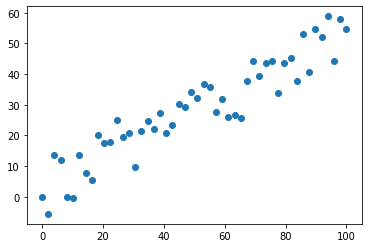

In [63]:
import matplotlib.pyplot as plt
plt.scatter(X, Y)

In [64]:
def gradient_descent(b_val, m_val, x_val, y_val, learning_rate, num_iterations):


    # Defining the error function
    vars = sp.symbols('x y m b n')
    x, y,m,b,n = vars
    n_val = float(len(x_val))
    error_function = ((1/(2*n)) * ((y - (m*x+b))**2))

    #calculating the partial derivatives
    error_function_b = sp.diff(error_function, b)
    error_function_m = sp.diff(error_function, m)

    # repeat for num_iterations
    for j in range(num_iterations): 
        b_gradient = 0
        m_gradient = 0
        for i in range(0, len(x_val)):
            b_gradient += error_function_b.subs({x:x_val[i], y: y_val[i], m:m_val, b:b_val, n:n_val})
            m_gradient += error_function_m.subs({x:x_val[i], y: y_val[i], m:m_val, b:b_val, n:n_val})

        #update the value for b and m    
        b_val -= (learning_rate * b_gradient)
        m_val -= (learning_rate * m_gradient)
        
    return [b_val, m_val]

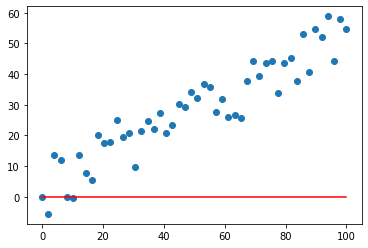

In [65]:
m_val = 0
b_val = 0

predictions = [(m_val * X[i]) + b_val for i in range(len(X))]
plt.scatter(X, Y)
plt.plot(X, predictions, color='r')

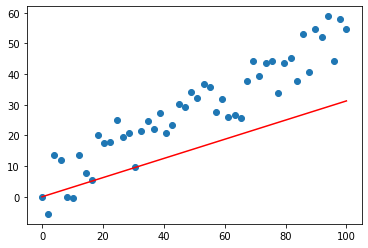

In [66]:
vals = gradient_descent(0, 0, X, Y, .0001, 2)
m_val = vals[1]
b_val = vals[0]
predictions = [(m_val * X[i]) + b_val for i in range(len(X))]
plt.scatter(X, Y)
plt.plot(X, predictions, color='r')

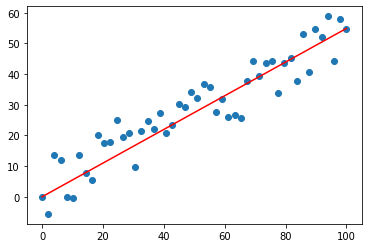

In [67]:
vals = gradient_descent(0, 0, X, Y, .0001, 10)
m_val = vals[1]
b_val = vals[0]
predictions = [(m_val * X[i]) + b_val for i in range(len(X))]
plt.scatter(X, Y)
plt.plot(X, predictions, color='r')

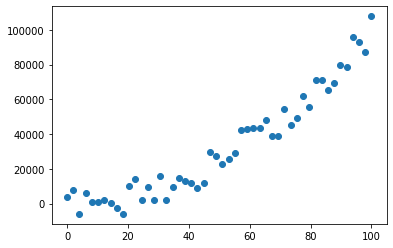

In [68]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0, 100, 50)
delta = np.random.uniform(-10000, 10000, X.size)
Y = 10*X**2 + 0.5*X + 3 + delta

plt.scatter(X, Y)

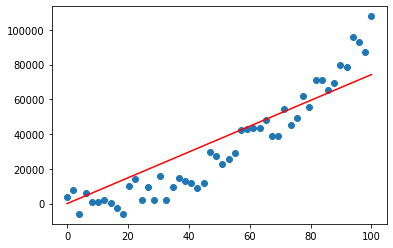

In [69]:
vals = gradient_descent(-5, 5, X, Y, .0001, 20)
m_val = vals[1]
b_val = vals[0]

predictions = [(m_val * X[i]) + b_val for i in range(len(X))]
plt.scatter(X, Y)
plt.plot(X, predictions, color='r')

In [70]:
def gradient_descent_poly(b_val, m_val, a_val, x_val, y_val, learning_rate, num_iterations):

    # Define x and y as mathematical symbols
    vars = sp.symbols('x y m b n a')
    x, y,m,b,n, a = vars
    n_val = float(len(x_val))
    error_function = ((1/(2*n)) * ((y - (a*(x**2) + m*x+b))**2))
    for j in range(num_iterations): # repeat for num_iterations
        b_gradient = 0
        m_gradient = 0
        a_gradient = 0
        for i in range(0, len(x_val)):
            #print(b)
            b_gradient += sp.diff(error_function, b).subs({x:x_val[i], y: y_val[i], m:m_val, a: a_val, b:b_val, n:n_val})
            m_gradient += sp.diff(error_function, m).subs({x:x_val[i], y: y_val[i], m:m_val, a: a_val, b:b_val, n:n_val})
            a_gradient += sp.diff(error_function, a).subs({x:x_val[i], y: y_val[i], m:m_val, a: a_val, b:b_val, n:n_val})
            
        b_val -= (learning_rate * b_gradient)
        m_val -= (learning_rate * m_gradient)
        a_val -= (learning_rate * a_gradient)
        
    return [b_val, m_val, a_val]

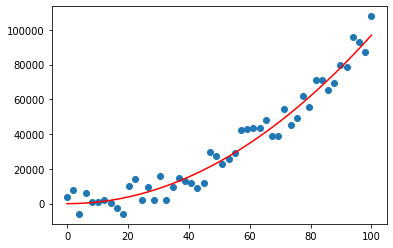

In [71]:
vals = gradient_descent_poly(-5, -5, -5, X, Y, .00000001, 20)
m_val = vals[1]
b_val = vals[0]
a_val = vals[2]
predictions = [(a_val * X[i]*X[i]) + (m_val * X[i]) + b_val for i in range(len(X))]
plt.scatter(X, Y)
plt.plot(X, predictions, color='r')

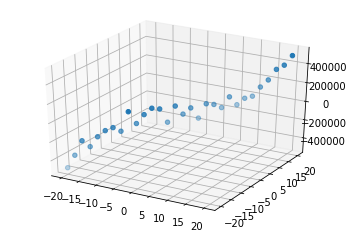

In [72]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
X = np.linspace(-20, 20, 30)
Y = np.linspace(-20, 20, 30)
delta = np.random.uniform(-100000, 100000, X.size)
Z = 5* X**3 + 18*Y**2 + 2*Y + 50* Y**3 + 4*X +30 + delta
ax.scatter3D(X, Y, Z, cmap='Greens');

In [23]:
def gradient_descent_poly_degree_three(b_val, m_val, a_val, c_val, d_val, e_val, x_val, y_val, z_val, learning_rate, num_iterations):

    # Define x and y as mathematical symbols
    vars = sp.symbols('x y z m b n a c d e')
    x, y,z , m,b,n, a, c, d, e = vars
    n_val = float(len(x_val))
    error_function = ((1/(2*n)) * ((z - (a*x**3 + c*y**2 + d*x + e*y**3 + m*x+b))**2))
    err_func_b  = sp.diff(error_function, b)
    err_func_m  = sp.diff(error_function, m)
    err_func_a  = sp.diff(error_function, a)
    err_func_c  = sp.diff(error_function, c)
    err_func_d  = sp.diff(error_function, d)
    err_func_e  = sp.diff(error_function, e)
    for j in range(num_iterations): # repeat for num_iterations
        b_gradient = 0
        m_gradient = 0
        a_gradient = 0
        c_gradient = 0
        d_gradient = 0
        e_gradient = 0
        for i in range(0, len(x_val)):
            #print(b)
            b_gradient += err_func_b.subs({x:x_val[i], y: y_val[i], z:z_val[i], m:m_val, a: a_val, b:b_val, n:n_val, c:c_val, d:d_val, e:e_val})
            m_gradient += err_func_m.subs({x:x_val[i], y: y_val[i], z:z_val[i], m:m_val, a: a_val, b:b_val, n:n_val, c:c_val, d:d_val, e:e_val})
            a_gradient += err_func_a.subs({x:x_val[i], y: y_val[i], z:z_val[i], m:m_val, a: a_val, b:b_val, n:n_val, c:c_val, d:d_val, e:e_val})
            c_gradient += err_func_c.subs({x:x_val[i], y: y_val[i], z:z_val[i], m:m_val, a: a_val, b:b_val, n:n_val, c:c_val, d:d_val, e:e_val})
            d_gradient += err_func_d.subs({x:x_val[i], y: y_val[i], z:z_val[i], m:m_val, a: a_val, b:b_val, n:n_val, c:c_val, d:d_val, e:e_val})
            e_gradient += err_func_e.subs({x:x_val[i], y: y_val[i], z:z_val[i], m:m_val, a: a_val, b:b_val, n:n_val, c:c_val, d:d_val, e:e_val})
            
        b_val -= (learning_rate * b_gradient)
        m_val -= (learning_rate * m_gradient)
        a_val -= (learning_rate * a_gradient)
        c_val -= (learning_rate * c_gradient)
        d_val -= (learning_rate * d_gradient)
        e_val -= (learning_rate * e_gradient)
        
    return [b_val, m_val, a_val, c_val, d_val, e_val]

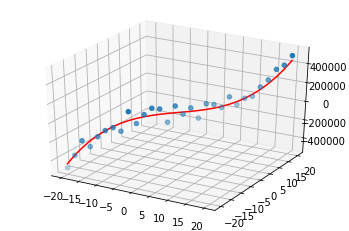

In [73]:
vals = gradient_descent_poly_degree_three(0, 0, 0, 0,0,0, X, Y, Z, .00000001, 10)
m_val = vals[1]
b_val = vals[0]
a_val = vals[2]
c_val = vals[3]
d_val = vals[4]
e_val = vals[5]

predictions = [a_val * X[i]**3 + c_val * Y[i]**2 + d_val * Y[i] + e_val * Y[i]**3 + m_val * X[i] + b_val for i in range(len(X))]
ax = plt.axes(projection='3d')

ax.scatter3D(X, Y,Z)
ax.plot3D(X, Y, predictions, color='r')

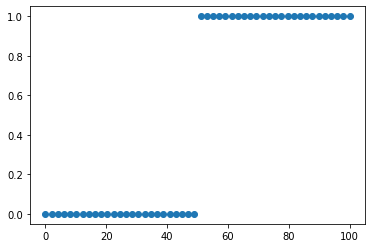

In [25]:
X = np.linspace(0, 100, 50)
Y = np.zeros(X.size)
Y[25:50] = 1
plt.scatter(X, Y)

In [74]:
def gradient_descent_logistic(b_val, m_val, x_val, y_val, learning_rate, num_iterations):


    # Defining the error function or the cost function
    vars = sp.symbols('x y m b n')
    x, y,m,b,n = vars
    n_val = float(len(x_val))
    error_function = -(1/(n)) * ((y * sp.log(1/ (1+(sp.exp(-(m*x+b)))))) + ((1-y) * sp.log(1 - (1/ (1+(sp.exp(-(m*x+b))))))))

    #calculatin partial derivative
    error_function_b = sp.diff(error_function, b)
    error_function_m = sp.diff(error_function, m)
    for j in range(num_iterations): # repeat for num_iterations
        b_gradient = 0
        m_gradient = 0
        for i in range(0, len(x_val)):
            #print(b)
            b_gradient += error_function_b.evalf(subs = {x:x_val[i], y:y_val[i], m:m_val, b:b_val,n:n_val})
            m_gradient += error_function_m.evalf(subs = {x:x_val[i], y:y_val[i], m:m_val, b:b_val,n:n_val})

        #correcting b and m in an ierative way    
        b_val -= (learning_rate * b_gradient)
        m_val -= (learning_rate * m_gradient)
        
        
    return [b_val, m_val]

19.1999317257957 -10.2998167902501


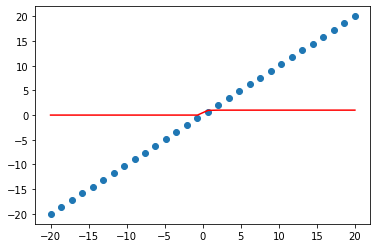

In [76]:
import math
vals = gradient_descent_logistic(-10, -5, X, Y, .01, 20)
m_val = vals[1]
b_val = vals[0]
print(m_val, b_val)
predictions = [1/(1+math.exp(-((m_val * X[i]) + b_val))) for i in range(len(X))]
plt.scatter(X, Y)
plt.plot(X, predictions, color='r')

In [44]:
import pandas as pd
dataset = pd.read_csv("zoo.csv")
dataset.head(4)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1


In [77]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = .3, random_state = 0)
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(xTrain, yTrain)
yPrediction = clf.predict(xTest)
yPrediction

In [ ]:
plt.scatter(xTrain, yTrain, color = 'red')
plt.plot(xTrain, clf.predict(xTrain), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
# Import the dependencies for logistic regression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
#Load the data set
data = sns.load_dataset("iris")
data.head()

In [ ]:
#Prepare the training set

# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]

# y = target values, last column of the data frame
y = data.iloc[:, -1]

In [ ]:
#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Train the model
model = LogisticRegression()
model.fit(x_train, y_train) #Training the model
predictions = model.predict(x_test)
print(predictions)# printing predictions